<a href="https://colab.research.google.com/github/afif-af/ml_pytorch_scikitlearn/blob/main/Chapter02ml_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
class Preceptron:
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta=eta
    self.n_iter=n_iter
    self.random_state=random_state

  def fit(self, x, y):
    rgen=np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01,
                        size=x.shape[1])
    self.b_ = np.float64(0.)
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(x, y):
        update = self.eta * (target - self.predict(xi))
        self.w_ += update * xi
        self.b_ += update
        errors += int(update !=0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, x):
    return np.dot(x, self.w_) + self.b_

  def predict(self, x):
    return np.where(self.net_input(x) >= 0.0, 1, 0)

In [2]:
v1 = np.array([1,2,3])

In [3]:
v2 = 0.5*v1

In [4]:
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

np.float64(0.0)

In [5]:
import os
import pandas as pd

In [6]:
s='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From url',s)

From url https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [7]:
df=pd.read_csv(s,header=None, encoding='utf-8')

In [8]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
y=df.iloc[0:100, 4].values
y=np.where(y == 'Iris-setosa',0, 1)
x=df.iloc[0:100,[0,2]].values

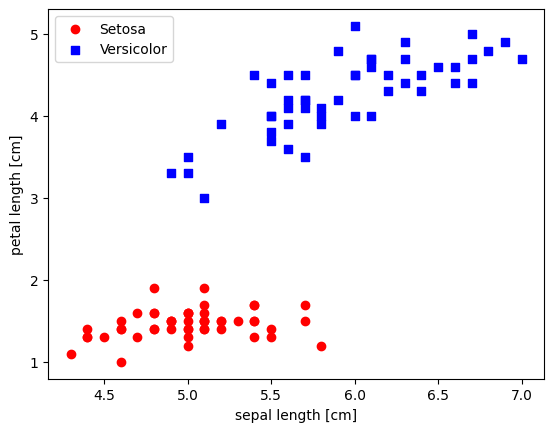

In [11]:
plt.scatter(x[:50, 0] ,x[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(x[50:100,0], x[50:100,1],
            color='blue',marker='s', label='Versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

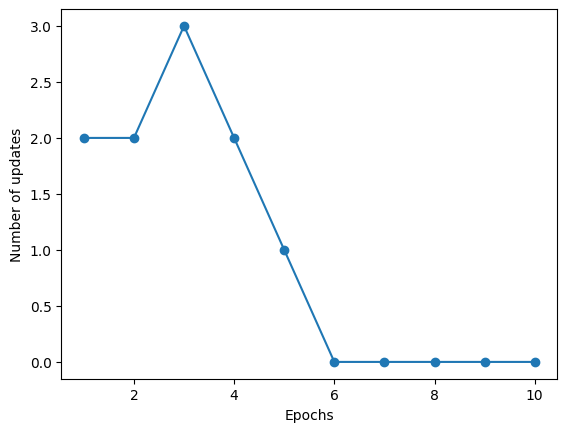

In [12]:
ppn=Preceptron(eta=0.1, n_iter=10)
ppn.fit(x,y)
plt.plot(range(1, len(ppn.errors_) + 1),
        ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [13]:
from matplotlib.colors import  ListedColormap

In [14]:
def plot_decision_regions(x, y, classifier, resolution=0.02):
  markers = ('o','s','^','v', '<')
  colors = ('red', 'blue','lightgreen','gray','cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
  x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  lab=classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab= lab.reshape(xx1.shape)

  plt.contourf(xx1, xx2, lab, aplpha=0.1, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=x[y == cl, 0],
                y=x[y== cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class {cl}',
                edgecolor='black')


<ipython-input-14-443a3c75cd00>:13: UserWarning: The following kwargs were not used by contour: 'aplpha'
  plt.contourf(xx1, xx2, lab, aplpha=0.1, cmap=cmap)


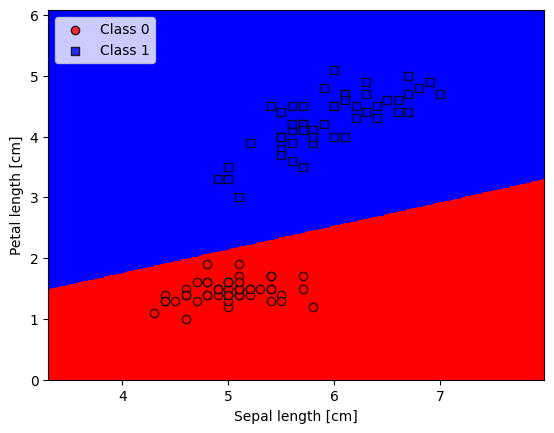

In [15]:
plot_decision_regions(x,y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [16]:
class AdalineGD:
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta=eta
    self.n_iter=n_iter
    self.random_state=random_state

  def fit(self, x, y):
    rgen=np.random.RandomState(self.random_state)
    self.w_ =rgen.normal(loc=0.0, scale=0.01,
                         size=x.shape[1])
    self.b_ =np.float64(0.)
    self.losses_ =[]

    for i in range(self.n_iter):
      net_input=self.net_input(x)
      output = self.activation(net_input)
      errors = (y- output)
      self.w_ += self.eta * 2.0 * x.T.dot((errors)/x.shape[0])
      self.b_ += self.eta * 2.0 * errors.mean()
      loss =(errors**2).mean()
      self.losses_.append(loss)
    return self

  def net_input(self, x):
    return np.dot(x, self.w_) +self.b_

  def activation(self, x):
    return x

  def predict(self, x):
    return np.where(self.activation(self.net_input(x)) >= 0.5, 1, 0)


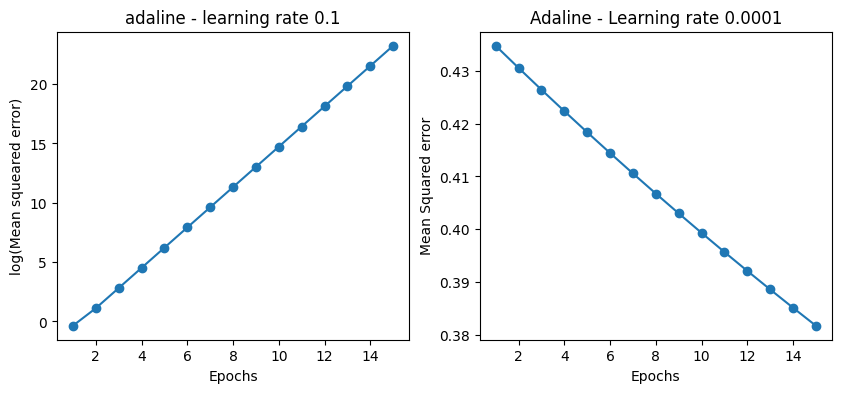

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=15, eta=0.1).fit(x,y)
ax[0].plot(range(1,len(ada1.losses_)+1),
           np.log10(ada1.losses_),marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squeared error)')
ax[0].set_title('adaline - learning rate 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(x,y)
ax[1].plot(range(1, len(ada2.losses_) +1),
           ada2.losses_,marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean Squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

In [18]:
x_std=np.copy(x)
x_std[:,0]=(x[:,0] -x[:,0].mean() /x[:,0].std())
x_std[:,1]=(x[:,1] -x[:,1].mean() /x[:,1].std())

In [19]:
ada_gd= AdalineGD(n_iter=20, eta=0.01)
ada_gd.fit(x_std, y)

<ipython-input-14-443a3c75cd00>:13: UserWarning: The following kwargs were not used by contour: 'aplpha'
  plt.contourf(xx1, xx2, lab, aplpha=0.1, cmap=cmap)


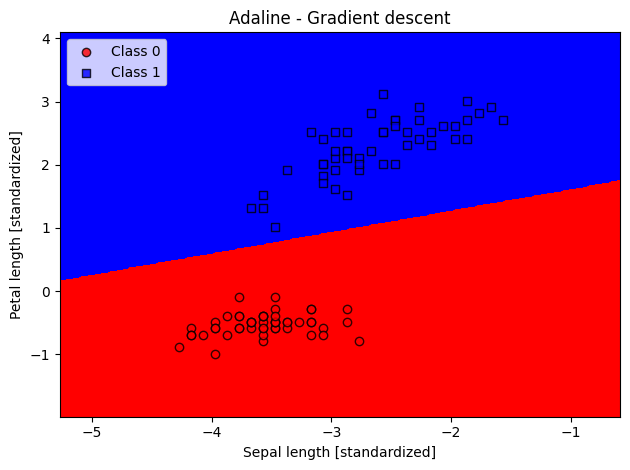

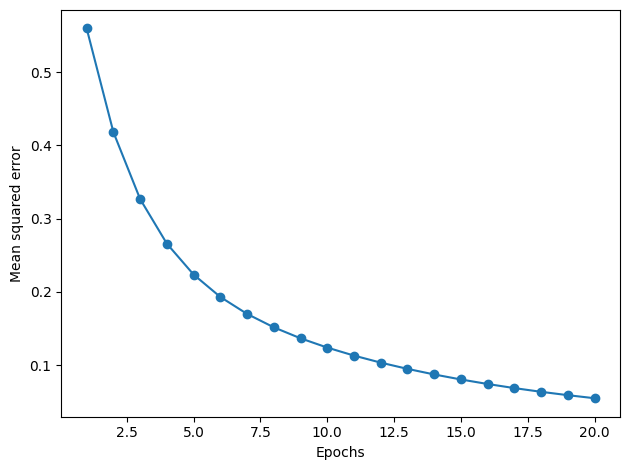

In [20]:
plot_decision_regions(x_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.losses_) + 1),
             ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.tight_layout()
plt.show()

In [27]:
class AdalineSGD:
  def __init__(self, eta=0.01, n_iter =50, shuffle=True , random_state= None):
    self.eta=eta
    self.n_iter=n_iter
    self.w_initialized=False
    self.shuffle=shuffle
    self.random_state=random_state

  def fit(self,x,y):
    self._initialize_weights(x.shape[1])
    self.losses_ = []
    for i in range(self.n_iter):
      if self.shuffle:
        x, y=self._shuffle(x,y)
      losses=[]
      for xi, target in zip(x,y):
        losses.append(self._update_weights(xi, target))
      avg_loss=np.mean(losses)
      self.losses_.append(avg_loss)
    return self

  def partial_fit(self,x,y):
    if not self.w_initialized:
      self._initializes_weights(x.shape[1])
    if y.ravel().shape[0]>1:
      for xi, target in zip(x,y):
        self._update_weights(xi, target)
    else:
      self._update_weights(x,y)
    return self

  def _shuffle(self,x,y):
    r=self.rgen.permutation(len(y))
    return x[r],y[r]

  def _initialize_weights(self,m):
    self.rgen=np.random.RandomState(self.random_state)
    self.w_=self.rgen.normal(loc=0.0,scale=0.01,size=m)
    self.b_=np.float64(0.)
    self.w_initialized=True

  def _update_weights(self,xi,target):
    output=self.activation(self.net_input(xi))
    error=(target-output)
    self.w_ +=self.eta * 2.0 * xi * (error)
    self.b_ +=self.eta * 2.0 * error
    loss =error **2
    return loss


  def net_input(self,x):
    return np.dot(x,self.w_)+self.b_

  def activation(self,x):
    return x

  def predict(self,x):
    return np.where(self.activation(self.net_input(x))>= 0.5, 1, 0)

<ipython-input-14-443a3c75cd00>:13: UserWarning: The following kwargs were not used by contour: 'aplpha'
  plt.contourf(xx1, xx2, lab, aplpha=0.1, cmap=cmap)


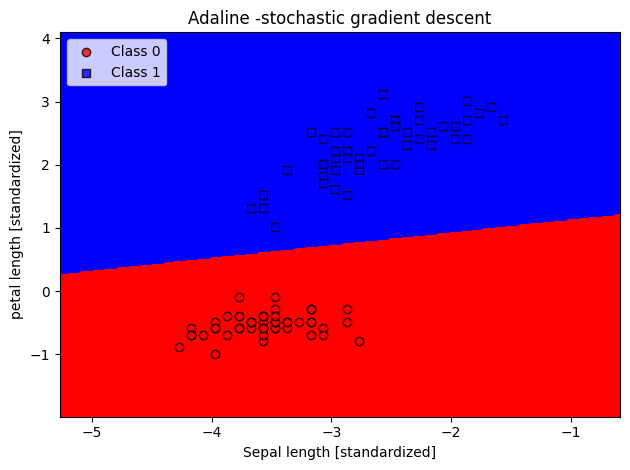

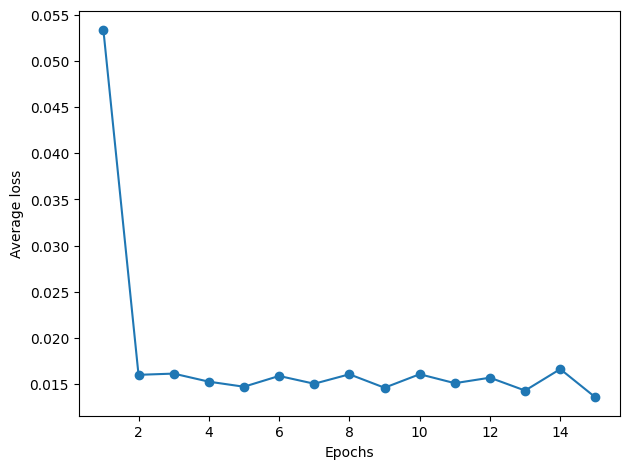

In [29]:
ada_sgd=AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(x_std, y)

plot_decision_regions(x_std, y, classifier=ada_sgd)

plt.title('Adaline -stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.losses_)+1),ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout()
plt.show()